In [1]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

In [2]:
ds_train = tfds.as_numpy(tfds.load('mnist', batch_size=-1, split='train'))
x_train, y_train = ds_train['image'], ds_train['label']

c0 = 0
c1 = 1 # class labels

class_0 = x_train[y_train == c0]
class_1 = x_train[y_train == c1]

np.random.shuffle(class_0)
np.random.shuffle(class_1)

n_tot = 50
y_tot = np.concatenate([np.ones((n_tot, 1)), -np.ones((n_tot, 1))])
x_tot = np.concatenate([class_0[:n_tot], class_1[:n_tot]])/255.

# y_test = np.concatenate([np.ones((n_test, 1)), -np.ones((n_test, 1))])
# x_test = np.concatenate([class_0[n_train:n_train+n_test], class_1[n_train:n_train+n_test]])

In [3]:
x_tot.shape

(100, 28, 28, 1)

In [4]:
x_tot = x_tot.reshape(2*n_tot, -1)
beta = x_tot.T @ np.linalg.inv(x_tot @ x_tot.T) @ y_tot
# beta = np.linalg.pinv(x_tot.T @ x_tot) @ x_tot.T @ y_tot
# beta = np.linalg.pinv(x_tot) @ y_tot
print(np.linalg.norm(beta), beta.max(), beta.min())

0.8086643469915986 0.1147818701382261 -0.22532547943269057


In [5]:
with open('precomputed_vals.npy', 'rb') as f:
    depths = np.load(f)
    matrices = np.load(f)

In [56]:
A = beta @ beta.T
norms2 = [np.trace(A @ A) - (np.trace(A @ b)**2)/np.trace(b @ b) for b in matrices]
# norms = [np.linalg.norm(A - b, 2) for b in matrices]

In [54]:
# what fraction of spectral energy is in direction of beta?
u = beta/np.linalg.norm(beta)
norms = [(1 - (u.T @ b @ u)**2/np.linalg.norm(b)**2).item() for b in matrices]

In [65]:
np.argmin(np.mean(all_losses, axis=0))

127

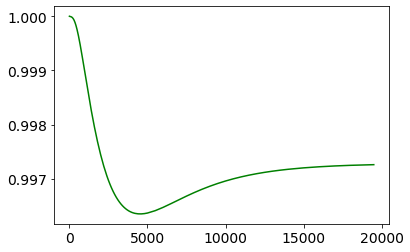

In [66]:
plt.rcParams.update({'font.size': 14})
plt.plot(depths, norms, color = 'g')
# plt.plot(depths, [i/norms2[0] for i in norms2], color = 'r')
plt.savefig("regress/mnist_norm.pdf", bbox_inches="tight")

In [8]:
M = x_tot @ x_tot.T
print(M @ np.linalg.inv(M) @ y_tot)
beta = x_tot.T @ np.linalg.inv(M) @ y_tot
print(x_tot @ beta)

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.

In [9]:
x_tot[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
def predict(B, x_train, y_train, x_test, y_test):

    K_train_train = x_train @ B @ x_train.T
    K_test_train = x_test @ B @ x_train.T
    inv = np.linalg.inv(K_train_train)
    pred = K_test_train @ inv @ y_train
        
    loss = np.mean((pred - y_test)**2)
    pred_class = np.where(pred > 0, 1., -1.)
    acc = np.mean(pred_class == y_test)

    return loss, acc

In [41]:
all_losses = []
all_accs = []
min_norm = []
for trial in range(20):   
    print(trial)
    n_train = 10
    idxs = np.random.choice(2*n_tot, size=n_train, replace=False)
    x_train = x_tot[idxs, :]
    y_train = y_tot[idxs]

    losses = []
    accs = []
    for i in range(1, len(depths)):
        B = matrices[i]
        depth = depths[i]
        loss, acc = predict(B, x_train, y_train, x_tot, y_tot)
        losses.append(loss)
        accs.append(acc)
    all_losses.append(losses)
    all_accs.append(accs)
    
    loss, acc = predict(np.eye(28*28), x_train, y_train, x_tot, y_tot)
    min_norm.append(loss)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
all_losses = np.array(all_losses)
min_norm = np.array(min_norm)

In [27]:
all_losses.shape

(20, 169)

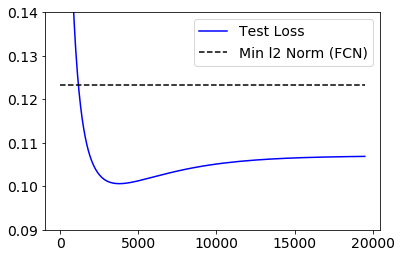

In [46]:
plt.rcParams.update({'font.size': 14})
plt.plot(depths[1:], np.mean(all_losses, axis=0), color='b', label = 'Test Loss')
plt.plot([depths[1], depths[-1]], [np.mean(min_norm), np.mean(min_norm)], linestyle='dashed', color='black', label='Min l2 Norm (FCN)')
# plt.ylim(min(losses) - 0.001, losses[-1] + 0.01)
plt.ylim(0.09, 0.14)
plt.legend()
plt.savefig("regress/mnist_loss.pdf", bbox_inches="tight")


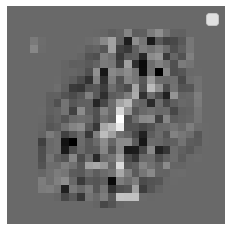

In [40]:
plt.imshow(beta.reshape(28, 28), cmap='Greys')
plt.axis("off")
plt.legend()
plt.savefig("regress/beta", bbox_inches="tight")